In [1]:
"""
Author: InquisitorNova(Kaylen Smith Darnbrook)
Date: 12/12/2023
File_Name: Tropical_Cyclone_Preprocessing
Description:
"""
import numpy as np 
import scipy as sp 
import sklearn as sk
import matplotlib.pyplot as plt 
import pandas as pd 
import pytorch_lightning as pyl
import torch as tor 
import seaborn as sns
from skimage.transform import resize
from PIL import Image 
import skorch
import tables
import h5py
from tensorflow import keras
from tensorflow.keras import layers
from skimage.transform import resize
import tensorflow as tf
import pickle

In [2]:
atln_cyclone_images = np.load(r"C:\Users\kdarn\OneDrive\Documents\Life's Portfolio\Projects\Machine Learning Personal Projects\Cyclone Imaging\Processed Cyclone Data\atln_cyclone_images.npy", allow_pickle = True)

In [3]:
cpac_cyclone_images = np.load(r"C:\Users\kdarn\OneDrive\Documents\Life's Portfolio\Projects\Machine Learning Personal Projects\Cyclone Imaging\Processed Cyclone Data\cpac_cyclone_images.npy", allow_pickle = True)

In [4]:
atln_labels = np.load(r"C:\Users\kdarn\OneDrive\Documents\Life's Portfolio\Projects\Machine Learning Personal Projects\Cyclone Imaging\Processed Cyclone Data\atln_labels.npy", allow_pickle = True)
cpac_labels = np.load(r"C:\Users\kdarn\OneDrive\Documents\Life's Portfolio\Projects\Machine Learning Personal Projects\Cyclone Imaging\Processed Cyclone Data\cpac_labels.npy", allow_pickle = True)

In [5]:
Dataset = np.concatenate([atln_cyclone_images, cpac_cyclone_images], axis = 0)

In [6]:
labels = np.concatenate([atln_labels, cpac_labels], axis = 0)

In [7]:
labels = pd.DataFrame(labels, columns = ["data_set", "ID", "lon", "latitude", "time", "Vmax", "R35", "MSLP"])

In [13]:
Cyclone_images = np.array([resize(x, (200,200)) for x in Dataset])

In [41]:
Adjusted_Cyclone_images = 255.*(Cyclone_images - Cyclone_images.min(axis = (1,2), keepdims=True))/(Cyclone_images.max(axis = (1,2), keepdims=True) - Cyclone_images.min(axis = (1,2), keepdims=True))
Adjusted_Cyclone_images.min(), Adjusted_Cyclone_images.max()

C:\Users\kdarn\AppData\Local\Temp\ipykernel_29120\3382867404.py:1: RuntimeWarning: overflow encountered in multiply
  Adjusted_Cyclone_images = 255.*(Cyclone_images - Cyclone_images.min(axis = (1,2), keepdims=True))/(Cyclone_images.max(axis = (1,2), keepdims=True) - Cyclone_images.min(axis = (1,2), keepdims=True))
C:\Users\kdarn\AppData\Local\Temp\ipykernel_29120\3382867404.py:1: RuntimeWarning: invalid value encountered in divide
  Adjusted_Cyclone_images = 255.*(Cyclone_images - Cyclone_images.min(axis = (1,2), keepdims=True))/(Cyclone_images.max(axis = (1,2), keepdims=True) - Cyclone_images.min(axis = (1,2), keepdims=True))


(nan, nan)

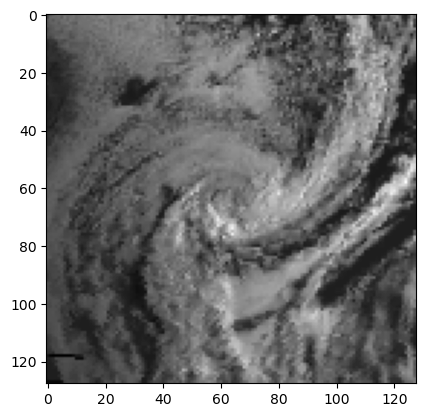

In [44]:
plt.imshow(Adjusted_Cyclone_images[4500,:, :, 2], cmap = "gray")

In [32]:
Adjusted_Cyclone_images[0]

array([[[2.49190628e+02, 2.47644531e+02, 3.34419203e+00, 0.00000000e+00],
        [2.46921661e+02, 2.49481232e+02, 9.45150280e+00, 0.00000000e+00],
        [2.46417587e+02, 2.46817245e+02, 1.05336657e+01, 0.00000000e+00],
        ...,
        [1.91915070e+02, 1.36416519e+02, 8.79428482e+01, 9.98339748e+00],
        [1.92054153e+02, 1.37514969e+02, 7.88682709e+01, 5.75566864e+00],
        [1.88854370e+02, 1.39879562e+02, 8.16529922e+01, 1.85373938e+00]],

       [[2.45182114e+02, 2.45332733e+02, 2.00883064e+01, 0.00000000e+00],
        [2.47089233e+02, 2.49174759e+02, 1.17906027e+01, 0.00000000e+00],
        [2.44473465e+02, 2.45261749e+02, 2.29892845e+01, 0.00000000e+00],
        ...,
        [1.74616653e+02, 1.31084702e+02, 1.52864853e+02, 1.34671268e+01],
        [1.81042282e+02, 1.34731903e+02, 1.16321007e+02, 9.45803833e+00],
        [1.78760193e+02, 1.36960663e+02, 1.12245514e+02, 4.76495743e+00]],

       [[2.47015717e+02, 2.41896362e+02, 1.37802467e+01, 0.00000000e+00],
        

In [45]:
Ultra_Adjusted_Cyclone_Images = np.round(Adjusted_Cyclone_images)
Ultra_Adjusted_Cyclone_Images[0].min()

0.0

In [46]:
Ultra_Adjusted_Cyclone_Images[0].max()

255.0

In [70]:
Ultra_Adjusted_Cyclone_Images[0]

array([[[250., 248.,   2.,   0.],
        [249., 249.,   2.,   0.],
        [249., 250.,   3.,   0.],
        ...,
        [193., 145.,  68.,   4.],
        [192., 145.,  73.,   2.],
        [199., 147.,  69.,   1.]],

       [[249., 247.,   3.,   0.],
        [248., 247.,   3.,   0.],
        [248., 250.,   5.,   0.],
        ...,
        [180., 141., 116.,   4.],
        [184., 145.,  98.,   2.],
        [187., 145.,  85.,   1.]],

       [[245., 246.,  13.,   0.],
        [245., 246.,   7.,   0.],
        [246., 250.,  11.,   0.],
        ...,
        [185., 141., 115.,   6.],
        [183., 141.,  91.,   4.],
        [187., 144.,  85.,   3.]],

       ...,

       [[165., 103.,  29.,   0.],
        [175., 105.,  26.,   0.],
        [151.,  95.,  34.,   0.],
        ...,
        [175., 128., 193.,   4.],
        [176., 125., 185.,   4.],
        [145., 109., 179.,   4.]],

       [[165., 105.,  35.,   0.],
        [168.,  98.,  32.,   0.],
        [163., 104.,  32.,   0.],
        .

In [55]:
Ultra_Adjusted_Cyclone_Images[0, :, :, :2].max()

255.0

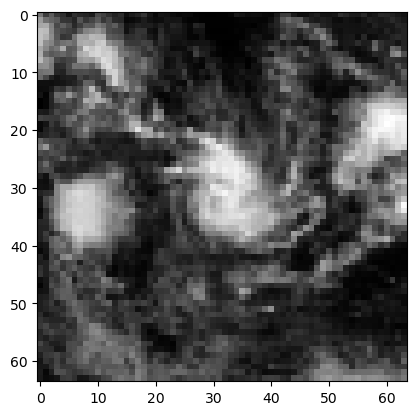

In [68]:
from skimage.transform import downscale_local_mean
plt.imshow(downscale_local_mean(Ultra_Adjusted_Cyclone_Images[5000, :, :, 2], (2,2)), cmap = "gray")

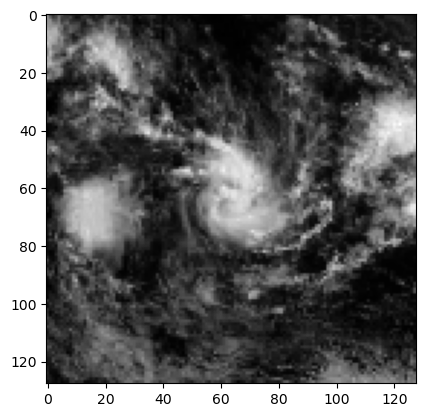

In [69]:
plt.imshow(Ultra_Adjusted_Cyclone_Images[5000,:, :, 2], cmap = "gray")

In [ ]:
np.save("Ultra_Adjusted_Cyclone_Images.npy", )

In [11]:
Cyclone_images.shape

(31678, 64, 64, 4)

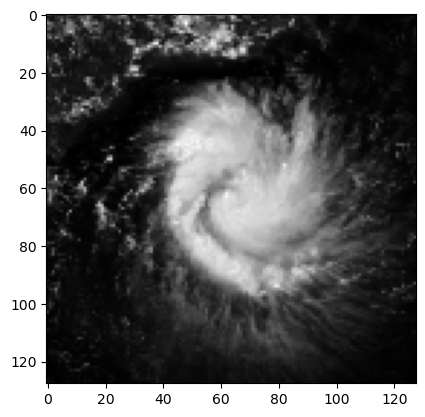

In [71]:
plt.imshow(Cyclone_images[1000,:, :, 2], cmap = "gray")

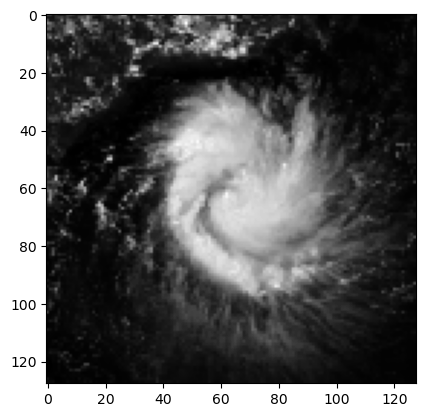

In [72]:
plt.imshow(Ultra_Adjusted_Cyclone_Images[1000,:, :, 2], cmap = "gray")

In [8]:
class SEblock(tf.keras.layers.Layer):
    def __init__(self,units, bottleneck_units):
        super().__init__()
        
        # Define the SE Block Layers:
        self.Dense = tf.keras.layers.Dense(units, kernel_initializer = "glorot_uniform", activation = "sigmoid")
        self.Global_Average_Pool = tf.keras.layers.GlobalAveragePooling2D()
        self.Bottleneck = tf.keras.layers.Dense(bottleneck_units, kernel_initializer = "he_normal", activation = "selu")
        self.Reshape = tf.keras.layers.Reshape((1,1,units))
        
    def call(self, x):
        x = self.Global_Average_Pool(x)
        x = self.Bottleneck(x)
        x = self.Dense(x)
        x = self.Reshape(x)
        return x

In [9]:
class Residual_Block(tf.keras.layers.Layer):
    def __init__(self,filters, units, units_bottleneck):
        super().__init__()
        
        # Define Residual Block Layers
        self.Conv_1 = tf.keras.layers.Conv2D(filters = filters, kernel_size = (3,3), padding = "same", kernel_initializer= "he_normal")
        self.Conv_2 = tf.keras.layers.Conv2D(filters = filters, kernel_size = (3,3), padding = "same", kernel_initializer = "he_normal")
        #self.ffn_1 = tf.keras.layers.Dense(filters, activation = "selu", kernel_initializer = "lecun_normal", kernel_regularizer = "l1_l2")
        #self.ffn_2 = tf.keras.layers.Dense(filters, activation = "selu", kernel_initializer = "lecun_normal", kernel_regularizer = "l1_l2")
        self.Conv_Bypass = tf.keras.layers.Conv2D(filters = filters, kernel_size = (1,1), padding = "same", strides = 1, kernel_initializer = "he_normal")
        self.Leaky_Relu = tf.keras.layers.LeakyReLU()
        self.Max_Pooling = tf.keras.layers.MaxPool2D(2,2)
        self.Batch_Norm_1 = tf.keras.layers.BatchNormalization()
        self.Batch_Norm_2 = tf.keras.layers.BatchNormalization()
        self.Batch_Norm_3 = tf.keras.layers.BatchNormalization()
        self.Dropout_1 = tf.keras.layers.Dropout(0.3)
        self.Dropout_2 = tf.keras.layers.Dropout(0.3)
        self.Dropout_3 = tf.keras.layers.Dropout(0.3)
        self.Add_Layer = tf.keras.layers.Add()
        self.Multiply_Layer = tf.keras.layers.Multiply()
        self.SE_block = SEblock(units, units_bottleneck)
        
    def call(self, x):
        d = self.Conv_Bypass(x)
        d = self.Batch_Norm_1(d)
        
        x = self.Conv_1(x)
        x = self.Leaky_Relu(x)
        x = self.Batch_Norm_2(x)
        
        x = self.Conv_2(x)
        x = self.Batch_Norm_3(x)
        
        y = self.SE_block(x)
        y = self.Multiply_Layer([x,y])
        x = self.Add_Layer([y,d])
        
        x = self.Leaky_Relu(x)
        x = self.Max_Pooling(x)
        return x

In [10]:
def RE_Net():
    inputs = tf.keras.layers.Input(shape = (200,200,1))
    x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = "same", kernel_initializer= "he_normal")(inputs)
    x = Residual_Block(filters = 32, units = 32, units_bottleneck = 4)(x)
    x = Residual_Block(filters = 64, units = 64, units_bottleneck = 16)(x)
    x = Residual_Block(filters = 128, units = 128, units_bottleneck = 32)(x)
    x = Residual_Block(filters = 128, units = 128, units_bottleneck = 32)(x)
    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(100, activation = "gelu", kernel_initializer = "he_normal", kernel_regularizer = "l1_l2")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    x = tf.keras.layers.Dense(100, activation = "gelu", kernel_initializer = "he_normal", kernel_regularizer = "l1_l2")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    x = tf.keras.layers.Dense(100, activation = "gelu", kernel_initializer = "he_normal", kernel_regularizer = "l1_l2")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    out = tf.keras.layers.Dense(1, activation = "sigmoid", kernel_initializer = "glorot_uniform")(x)
    Model = tf.keras.Model(inputs = inputs, outputs = out)
    
    return Model
SE_Net = RE_Net()
SE_Net.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 32)      320       
                                                                 
 residual__block (Residual_  (None, 100, 100, 32)      20228     
 Block)                                                          
                                                                 
 residual__block_1 (Residua  (None, 50, 50, 64)        60432     
 l_Block)                                                        
                                                                 
 residual__block_2 (Residua  (None, 25, 25, 128)       239648    
 l_Block)                                                        
                                                             

In [11]:
SE_Net.load_weights(r"C:\Users\kdarn\OneDrive\Documents\Life's Portfolio\Projects\Machine Learning Personal Projects\Cyclone Imaging\CycloneCleanerWeights\CycloneCleaner.h5")
SE_Net.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 32)      320       
                                                                 
 residual__block (Residual_  (None, 100, 100, 32)      20228     
 Block)                                                          
                                                                 
 residual__block_1 (Residua  (None, 50, 50, 64)        60432     
 l_Block)                                                        
                                                                 
 residual__block_2 (Residua  (None, 25, 25, 128)       239648    
 l_Block)                                                        
                                                             

In [14]:
Predictions = SE_Net.predict(Cyclone_images[:,:,:,2])
Predictions.shape

990/990 [==============================] - 514s 518ms/step


(31678, 1)

In [15]:
np.unique(np.round(Predictions), return_counts = True)

(array([0., 1.], dtype=float32), array([10602, 21076], dtype=int64))

In [16]:
import random
def plot_random_cyclone(images, sample = 9):
    random_image_indexes = random.sample(list(np.arange(0, len(images), 1)), sample)
    if (np.sqrt(sample) - int(np.sqrt(sample))) == 0:
        sqrt = int(np.sqrt(sample))
        Length, width = sqrt,sqrt
    else:
        Length, width = 1, sample
    fig = plt.figure(figsize = (20,20))
    for index, values in enumerate(random_image_indexes):
        plt.subplot(Length, width, index+1)
        plt.imshow(images[values], cmap = "gray")
        plt.title(f"Cyclone_id: {random_image_indexes[index]}\n Shape: {images[values].shape}")

In [17]:
mask = [bool(x) for x in np.round(Predictions).reshape(-1,)]
Masked_Cyclone_Images = Cyclone_images[mask]
Masked_Cyclone_Images.shape

(21076, 200, 200, 4)

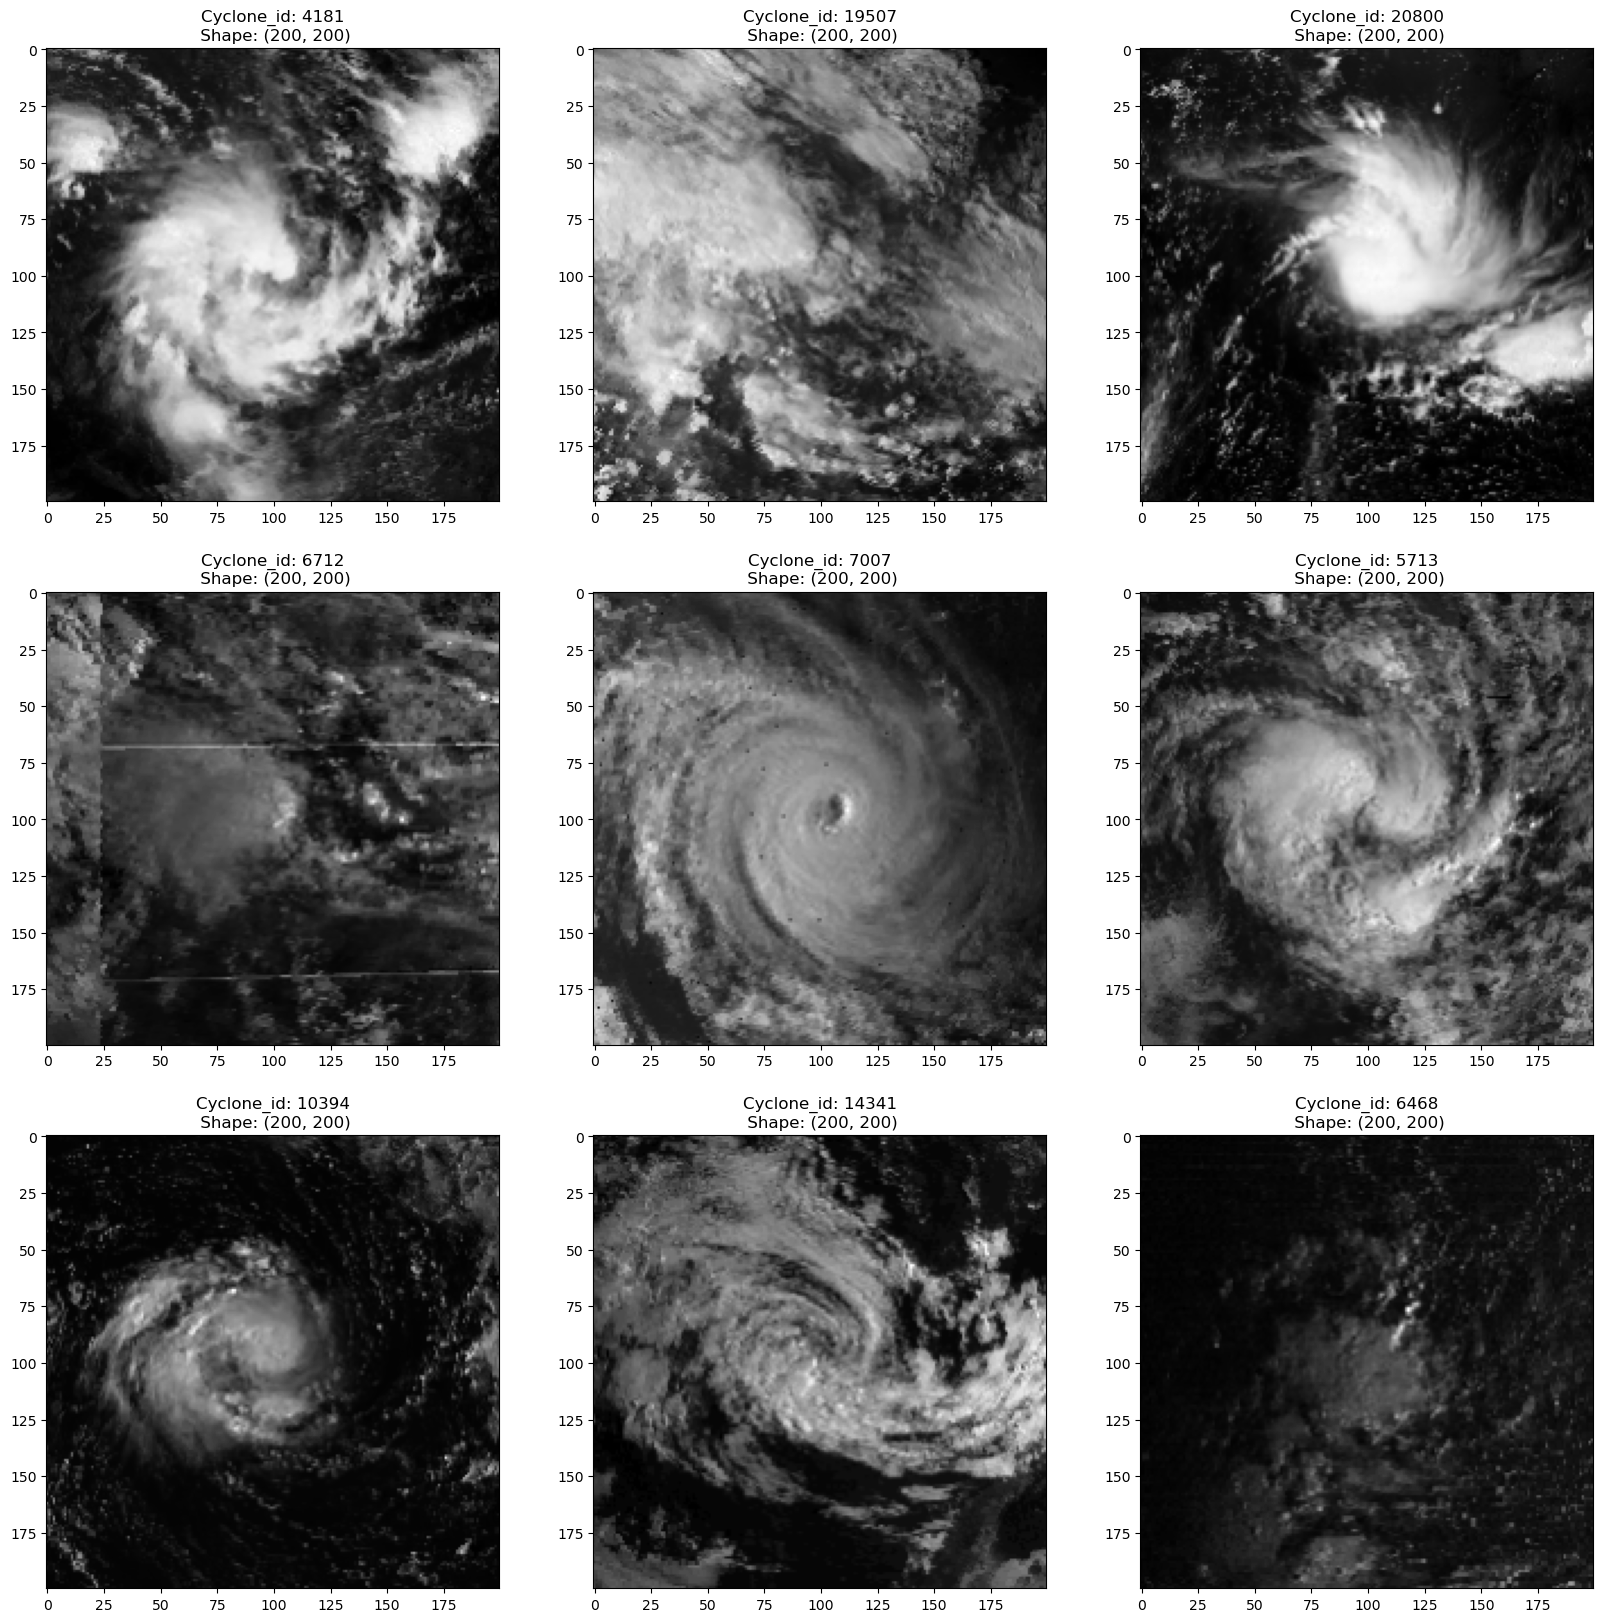

In [18]:
plot_random_cyclone(Cyclone_images[mask, :, :, 2], sample = 9)

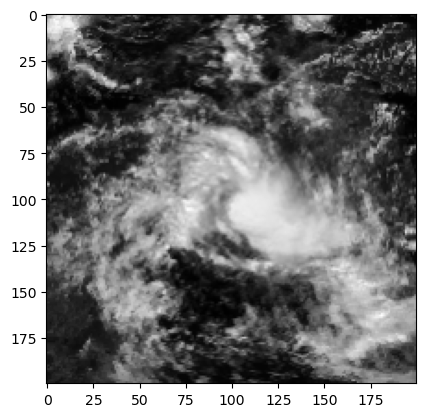

In [19]:
plt.imshow(Masked_Cyclone_Images[10977, :, :, 2], cmap = "gray")

In [20]:
Masked_Cyclone_Images = np.array([resize(x, (128,128)) for x in Masked_Cyclone_Images])

In [21]:
Adjusted_Cyclone_images = 255.*(Masked_Cyclone_Images - Masked_Cyclone_Images.min(axis = (1,2), keepdims=True))/(Masked_Cyclone_Images.max(axis = (1,2), keepdims=True) - Masked_Cyclone_Images.min(axis = (1,2), keepdims=True))
Adjusted_Cyclone_images.min(), Adjusted_Cyclone_images.max()

C:\Users\kdarn\AppData\Local\Temp\ipykernel_24148\1053150426.py:1: RuntimeWarning: overflow encountered in multiply
  Adjusted_Cyclone_images = 255.*(Masked_Cyclone_Images - Masked_Cyclone_Images.min(axis = (1,2), keepdims=True))/(Masked_Cyclone_Images.max(axis = (1,2), keepdims=True) - Masked_Cyclone_Images.min(axis = (1,2), keepdims=True))
C:\Users\kdarn\AppData\Local\Temp\ipykernel_24148\1053150426.py:1: RuntimeWarning: invalid value encountered in divide
  Adjusted_Cyclone_images = 255.*(Masked_Cyclone_Images - Masked_Cyclone_Images.min(axis = (1,2), keepdims=True))/(Masked_Cyclone_Images.max(axis = (1,2), keepdims=True) - Masked_Cyclone_Images.min(axis = (1,2), keepdims=True))


(nan, nan)

In [22]:
Ultra_Adjusted_Cyclone_Images = np.round(Adjusted_Cyclone_images)
Ultra_Adjusted_Cyclone_Images[0].min()

0.0

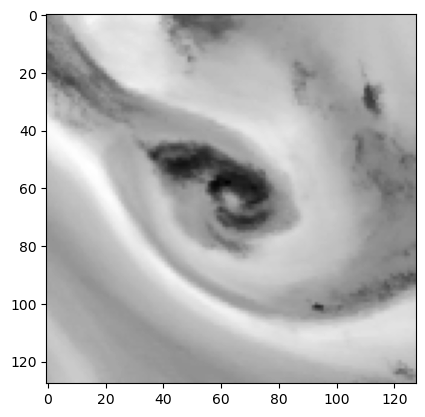

In [33]:
plt.imshow(Ultra_Adjusted_Cyclone_Images[1097, :, :, 1], cmap = "gray")

In [34]:
Masked_Labels = labels[mask]
Masked_Labels.shape

(21076, 8)

In [ ]:
Masked_Labels.hea

In [41]:
Masked_Labels.map({"ATLN":0, "WPAC":1, })

,data_set,ID,lon,latitude,time,Vmax,R35,MSLP
0,ATLN,200301L,-66.0,31.4,2003041815,30.0,0.0,1008.0
1,ATLN,200301L,-66.3,31.9,2003041818,30.0,0.0,1007.0
2,ATLN,200301L,-66.6,32.5,2003041821,30.0,0.0,1007.0
3,ATLN,200301L,-68.6,34.5,2003041912,35.0,0.0,1006.0
4,ATLN,200301L,-68.8,34.4,2003041915,35.0,0.0,1006.0
...,...,...,...,...,...,...,...,...
31671,WPAC,201630W,116.1,14.7,2016122706,50.0,77.5,985.0
31672,WPAC,201630W,115.8,14.4,2016122709,43.0,76.2,991.0
31675,WPAC,201630W,113.3,12.9,2016122800,25.0,0.0,1007.0
31676,WPAC,201630W,112.8,12.4,2016122803,23.0,0.0,1007.0


In [42]:
with h5py.File("Cyclone_Images.h5", "w") as hf:
    hf.create_dataset("Images", data = Ultra_Adjusted_Cyclone_Images)

In [43]:
np.save("Masked_Cyclone_Labels.npy", Masked_Labels)

In [23]:
Masked_Labels = labels[mask]
Masked_Labels.shape

(21076, 8)

In [24]:
len(labels.ID.value_counts())

626

In [25]:
Masked_Labels.ID.value_counts()

ID
200409L    172
200326W    156
200302W    146
200319L    144
200802L    144
          ... 
201113W      2
201008W      2
200811W      2
200923W      2
201211W      2
Name: count, Length: 485, dtype: int64

In [ ]:
np.save("Masked_Cyclone_Dataset.npy", Masked_Cyclone_Images)
np.save("Masked_Cyclone_Labels.npy", Masked_Labels)

In [35]:
np.load("Masked_Cyclone_Dataset.npy")

array([[[[2.93411224e+02, 2.53138245e+02, 3.19750868e-02,
          0.00000000e+00],
         [2.93893829e+02, 2.52792618e+02, 2.20624302e-02,
          0.00000000e+00],
         [2.93408722e+02, 2.53139130e+02, 2.70126816e-02,
          0.00000000e+00],
         ...,
         [2.78214813e+02, 2.39119995e+02, 2.48601466e-01,
          7.36646205e-02],
         [2.75999603e+02, 2.39119995e+02, 3.29157889e-01,
          4.14222367e-02],
         [2.81375732e+02, 2.39637405e+02, 2.38229439e-01,
          1.59521233e-02]],

        [[2.93408722e+02, 2.52789993e+02, 3.20000239e-02,
          0.00000000e+00],
         [2.92899994e+02, 2.52789993e+02, 3.20000239e-02,
          0.00000000e+00],
         [2.92899994e+02, 2.52794373e+02, 3.20625231e-02,
          0.00000000e+00],
         ...,
         [2.74838257e+02, 2.39119949e+02, 3.09497058e-01,
          6.17944039e-02],
         [2.77071136e+02, 2.39119995e+02, 2.39191055e-01,
          3.63006219e-02],
         [2.77088226e+02, 2.3911999